In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [2]:
# Firts model with ResNet50, size of images must be 224x224

img_height, img_width = 224, 224
batch_size = 32 

# Set the images directorys

train_dir = '../data/train'
valid_dir = '../data/valid'
test_dir = '../data/test'

# Images Preprocessing

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1120 images belonging to 4 classes.
Found 160 images belonging to 4 classes.


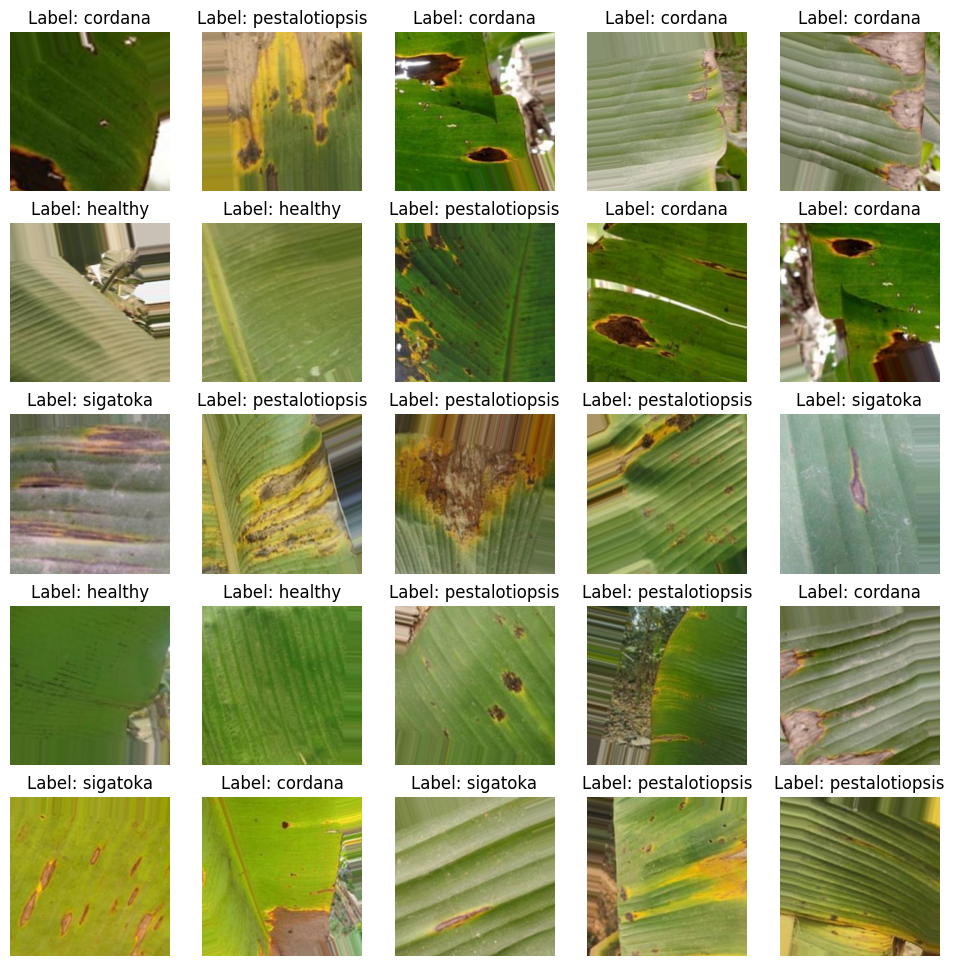

In [3]:
# Get a dictionary of classes (name -> index)
class_labels = train_generator.class_indices

# Reset the dictionary to get the index of the class
class_labels = {v: k for k, v in class_labels.items()}

# Get a batch of images and labels
images, labels = next(train_generator)

# Show the images and labels
plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
    label_index = labels[i].argmax()  
    plt.title(f'Label: {class_labels[label_index]}')
plt.show()

In [4]:
# Load ResNet50 model

base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model

base_model_resnet.trainable = False

In [5]:
model_resnet = Sequential([
    base_model_resnet,
    GlobalAveragePooling2D(),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(train_generator.num_classes, activation='softmax')
])

In [6]:
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model_resnet.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size,
    epochs=50)  # You can increase the number of epochs


d:\Universidad\6toSemeste\IA\Banana-Disease-Clasification\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
 4/35 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.2799 - loss: 1.4227

In [ ]:
val_loss, val_accuracy = model_resnet.evaluate(valid_generator)
print(f"Validation accuracy: {val_accuracy:.2f}")


In [ ]:
# model.save('modelResNet50.h5')

In [ ]:
# from tensorflow.keras.models import load_model
# from tensorflow.keras.preprocessing import image
# import numpy as np
# # Cargar el modelo
# model = load_model('modelResNet50.h5')

# # Función para predecir una imagen individual
# def predict_image(img_path):
#     img = image.load_img(img_path, target_size=(img_height, img_width))
#     img_array = image.img_to_array(img) / 255.0
#     img_array = np.expand_dims(img_array, axis=0)
#     prediction = model.predict(img_array)
#     predicted_class = np.argmax(prediction, axis=1)
#     return class_labels[predicted_class[0]]

# # Ejemplo de uso
# img_path = '../data/valid/healthy/34.jpeg'
# resultado = predict_image(img_path)
# print(f'La imagen pertenece a la clase: {resultado}')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ruta a tus datos
test_dir = '../data/test'

# Preprocesamiento del conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Importante para obtener las etiquetas en el mismo orden
)

# Obtener las predicciones del modelo
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)

# Obtener las etiquetas verdaderas
y_true = test_generator.classes

# Obtener los nombres de las clases
class_labels = list(test_generator.class_indices.keys())

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
